In [2]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.2 (v3.7.2:9a3ffc0492, Dec 24 2018, 02:44:43) 
[Clang 6.0 (clang-600.0.57)]


In [34]:
import geopy
import seaborn as sns

In [33]:
import pandas as pd
import dateutil.parser as date
import datetime as dt
import calendar
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.precision', 7)
pd.set_option('display.max_seq_items', None)

mta_data_directory = '/Users/biancapery/Downloads/turnstile data'#'/Users/busola.oladapo/Documents/Github/sf19_ds15/challenges/challenge1/turnstile data'

In [7]:
def read_data(directory):
    data = pd.DataFrame()
    
    for file in os.scandir(directory):
        data = data.append(pd.read_csv(file.path))
        
    return data

# store mta data files for 3 months in a dataframe
turnstile = read_data(mta_data_directory)
print(f'Turnstile dataset: {turnstile.shape[0]} records')
turnstile.head()

Turnstile dataset: 2653353 records


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573


In [8]:
# remove whitespace from column names
turnstile.columns = turnstile.columns.str.strip()

# set index for turnstile data to the first four columns, uniquely identifying a turnstile at each station
turnstile_index = ['C/A', 'UNIT', 'SCP', 'STATION']
turnstile = turnstile.set_index(turnstile_index)
turnstile.head()

LINENAME DIVISION        DATE      TIME     DESC  \
C/A  UNIT SCP      STATION                                                    
A002 R051 02-00-00 59 ST    NQR456W      BMT  03/23/2019  00:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  04:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  08:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  12:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  16:00:00  REGULAR   

                            ENTRIES    EXITS  
C/A  UNIT SCP      STATION                    
A002 R051 02-00-00 59 ST    6989774  2370411  
                   59 ST    6989795  2370413  
                   59 ST    6989813  2370436  
                   59 ST    6989924  2370512  
                   59 ST    6990200  2370573

In [9]:
# get a datetime field, day of week, and week number for each record
def get_day_of_week(row):
    return calendar.day_name[row['DATE_TIME'].weekday()]


turnstile['DATE_TIME'] = turnstile['DATE'] + ' ' + turnstile['TIME']
turnstile['DATE_TIME'] = turnstile['DATE_TIME'].apply(date.parse)
turnstile['DAY'] = turnstile.apply(get_day_of_week, axis=1)
turnstile['WEEK'] = turnstile['DATE_TIME'].dt.weekofyear
turnstile['HOUR'] = turnstile['DATE_TIME'].dt.hour
turnstile.head()

LINENAME DIVISION        DATE      TIME     DESC  \
C/A  UNIT SCP      STATION                                                    
A002 R051 02-00-00 59 ST    NQR456W      BMT  03/23/2019  00:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  04:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  08:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  12:00:00  REGULAR   
                   59 ST    NQR456W      BMT  03/23/2019  16:00:00  REGULAR   

                            ENTRIES    EXITS           DATE_TIME       DAY  \
C/A  UNIT SCP      STATION                                                   
A002 R051 02-00-00 59 ST    6989774  2370411 2019-03-23 00:00:00  Saturday   
                   59 ST    6989795  2370413 2019-03-23 04:00:00  Saturday   
                   59 ST    6989813  2370436 2019-03-23 08:00:00  Saturday   
                   59 ST    6989924  2370512 2019-03-23 12:00:00  Saturday   
                   59 ST    6990200  2370573 2019-03-23 16:00:00  Saturday   

                            WEEK  HOUR  
C/A  UNIT SCP      STATION              
A002 R051 02-00-00 59 ST      12     0  
                   59 ST      12     4  
                   59 ST      12     8  
                   59 ST      12    12  
                   59 ST      12    16

In [10]:
# # get total entries and exits for each turnstile on each day
# turnstile_day = turnstile[turnstile['TIME'] == '00:00:00']
# turnstile_day = turnstile_day.reset_index()
# turnstile_day = turnstile_day.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION','DATE_TIME'])
# turnstile_day['ENTRIES/DAY'] = (turnstile_day.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['ENTRIES']
#                                 .transform(lambda x: -1 * x.diff(periods=-1)))
# turnstile_day['EXITS/DAY'] = (turnstile_day.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['EXITS']
#                                 .transform(lambda x: -1 * x.diff(periods=-1)))
# turnstile_day = turnstile_day.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])
# turnstile_day.head(20)

In [11]:
# get total entries and exits for each turnstile on each day
# turnstile_day = turnstile[turnstile['TIME'] == '00:00:00']
turnstile = turnstile.reset_index()
turnstile = turnstile.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION','DATE_TIME'])
turnstile['ENTRIES/INCR'] = (turnstile.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['ENTRIES']
                                .transform(lambda x: -1 * x.diff(periods=-1)))
turnstile['EXITS/INCR'] = (turnstile.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['EXITS']
                                .transform(lambda x: -1 * x.diff(periods=-1)))
turnstile = turnstile.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])
turnstile.head(20)

LINENAME DIVISION        DATE      TIME     DESC  \
C/A  UNIT SCP      STATION                                                    
A002 R051 02-00-00 59 ST    NQR456W      BMT  02/23/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  07:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  11:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  15:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  19:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/23/2019  23:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  07:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  11:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  15:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  19:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/24/2019  23:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  07:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  11:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  15:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  19:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/25/2019  23:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/26/2019  03:00:00  REGULAR   
                   59 ST    NQR456W      BMT  02/26/2019  07:00:00  REGULAR   

                            ENTRIES    EXITS           DATE_TIME       DAY  \
C/A  UNIT SCP      STATION                                                   
A002 R051 02-00-00 59 ST    6955483  2359112 2019-02-23 03:00:00  Saturday   
                   59 ST    6955494  2359125 2019-02-23 07:00:00  Saturday   
                   59 ST    6955554  2359199 2019-02-23 11:00:00  Saturday   
                   59 ST    6955714  2359248 2019-02-23 15:00:00  Saturday   
                   59 ST    6956004  2359292 2019-02-23 19:00:00  Saturday   
                   59 ST    6956147  2359325 2019-02-23 23:00:00  Saturday   
                   59 ST    6956177  2359332 2019-02-24 03:00:00    Sunday   
                   59 ST    6956184  2359339 2019-02-24 07:00:00    Sunday   
                   59 ST    6956215  2359388 2019-02-24 11:00:00    Sunday   
                   59 ST    6956315  2359432 2019-02-24 15:00:00    Sunday   
                   59 ST    6956472  2359469 2019-02-24 19:00:00    Sunday   
                   59 ST    6956566  2359492 2019-02-24 23:00:00    Sunday   
                   59 ST    6956582  2359496 2019-02-25 03:00:00    Monday   
                   59 ST    6956590  2359535 2019-02-25 07:00:00    Monday   
                   59 ST    6956705  2359829 2019-02-25 11:00:00    Monday   
                   59 ST    6956905  2359900 2019-02-25 15:00:00    Monday   
                   59 ST    6957645  2359978 2019-02-25 19:00:00    Monday   
                   59 ST    6957918  2360018 2019-02-25 23:00:00    Monday   
                   59 ST    6957937  2360027 2019-02-26 03:00:00   Tuesday   
                   59 ST    6957947  2360074 2019-02-26 07:00:00   Tuesday   

                            WEEK  HOUR  ENTRIES/INCR  EXITS/INCR  
C/A  UNIT SCP      STATION                                        
A002 R051 02-00-00 59 ST       8     3          11.0        13.0  
                   59 ST       8     7          60.0        74.0  
                   59 ST       8    11         160.0        49.0  
                   59 ST       8    15         290.0        44.0  
                   59 ST       8    19         143.0        33.0  
                   59 ST       8    23          30.0         7.0  
                   59 ST       8   

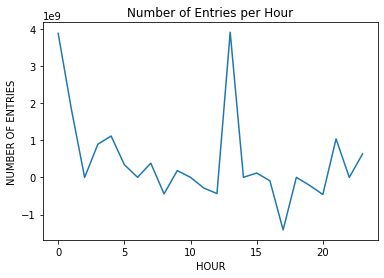

In [50]:
# turnstile.groupby('HOUR')['ENTRIES/INCR'].sum().reset_index()
entries_by_hour = turnstile.groupby('HOUR')['ENTRIES/INCR'].sum().reset_index()
#plt.plot(entries_by_hour['HOUR'], entries_by_hour['ENTRIES/INCR']);

entries_by_hour_plot = sns.lineplot(entries_by_hour['HOUR'], entries_by_hour['ENTRIES/INCR'])
entries_by_hour_plot.set_ylabel('NUMBER OF ENTRIES');
entries_by_hour_plot.set_title("Number of Entries per Hour");




In [13]:
negative_turnstiles = turnstile[(turnstile['ENTRIES/INCR'] < 0) & (turnstile['ENTRIES/INCR'] < -1000)].reset_index()
negative_turnstiles = negative_turnstiles[['C/A', 'UNIT', 'SCP', 'STATION']]
negative_turnstiles = negative_turnstiles.drop_duplicates()
turnstile2 = turnstile.merge(negative_turnstiles, on=['C/A', 'UNIT', 'SCP', 'STATION'], how='left', indicator=True)
turnstile2 = turnstile2[turnstile2['_merge'] == 'left_only']
turnstile2 = turnstile2.drop(columns='_merge')
turnstile2.head(10)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,WEEK,HOUR,ENTRIES/INCR,EXITS/INCR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112,2019-02-23 03:00:00,Saturday,8,3,11.0,13.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125,2019-02-23 07:00:00,Saturday,8,7,60.0,74.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199,2019-02-23 11:00:00,Saturday,8,11,160.0,49.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248,2019-02-23 15:00:00,Saturday,8,15,290.0,44.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292,2019-02-23 19:00:00,Saturday,8,19,143.0,33.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,23:00:00,REGULAR,6956147,2359325,2019-02-23 23:00:00,Saturday,8,23,30.0,7.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,03:00:00,REGULAR,6956177,2359332,2019-02-24 03:00:00,Sunday,8,3,7.0,7.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,07:00:00,REGULAR,6956184,2359339,2019-02-24 07:00:00,Sunday,8,7,31.0,49.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,11:00:00,REGULAR,6956215,2359388,2019-02-24 11:00:00,Sunday,8,11,100.0,44.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2019,15:00:00,REGULAR,6956315,2359432,2019-02-24 15:00:00,Sunday,8,15,157.0,37.0


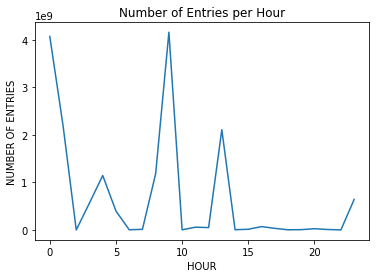

In [51]:
entries_by_hour2 = turnstile2.groupby('HOUR')['ENTRIES/INCR'].sum().reset_index()
# plt.figure(figsize=[12,7])
# plt.xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# plt.plot(entries_by_hour2['HOUR'], entries_by_hour2['ENTRIES/INCR']);
entries_by_hour2_plot = sns.lineplot(entries_by_hour2['HOUR'], entries_by_hour2['ENTRIES/INCR'])
entries_by_hour2_plot.set_ylabel('NUMBER OF ENTRIES');
entries_by_hour2_plot.set_title("Number of Entries per Hour");


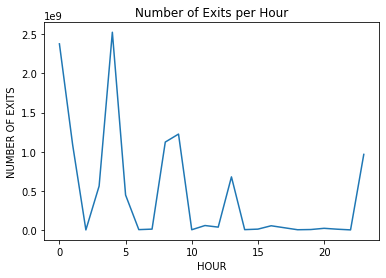

In [55]:
exits_by_hour = turnstile2.groupby('HOUR')['EXITS/INCR'].sum().reset_index()
# plt.figure(figsize=[12,7])
# plt.xticks = np.arange(len(exits_by_hour['HOUR']))
# plt.xticklabels = exits_by_hour['HOUR']
# plt.plot(exits_by_hour['HOUR'], exits_by_hour['EXITS/INCR'])
exits_by_hour_plot = sns.lineplot(x=exits_by_hour['HOUR'], y=exits_by_hour['EXITS/INCR'], markers=True)
exits_by_hour_plot.set_ylabel('NUMBER OF EXITS');
exits_by_hour_plot.set_title("Number of Exits per Hour");


In [16]:
exits_by_hour.sort_values(by='EXITS/INCR', ascending=False)

,HOUR,EXITS/INCR
4,4,2526432997.0
0,0,2378122334.0
9,9,1225005530.0
8,8,1122993815.0
1,1,1087541180.0
23,23,965511884.0
13,13,678148422.0
3,3,560827390.0
5,5,446217222.0
11,11,56350372.0


In [17]:
turnstile_4p_to_8p = turnstile2[turnstile2['HOUR'].isin([16, 17, 18, 19])]
station_exits_4p_to_8p = turnstile_4p_to_8p.groupby('STATION')['EXITS/INCR'].sum().reset_index().sort_values('EXITS/INCR', ascending=False)
high10_station_exits_4p_to_8p = station_exits_4p_to_8p.head(10)
high10_station_exits_4p_to_8p


,STATION,EXITS/INCR
61,34 ST-PENN STA,3402277.0
233,GRD CNTRL-42 ST,2016809.0
68,42 ST-PORT AUTH,1981294.0
353,TIMES SQ-42 ST,1620948.0
14,14 ST-UNION SQ,1512224.0
110,86 ST,1491074.0
217,FLUSHING-MAIN,1310329.0
46,23 ST,1302943.0
59,34 ST-HERALD SQ,1289082.0
9,125 ST,1260278.0


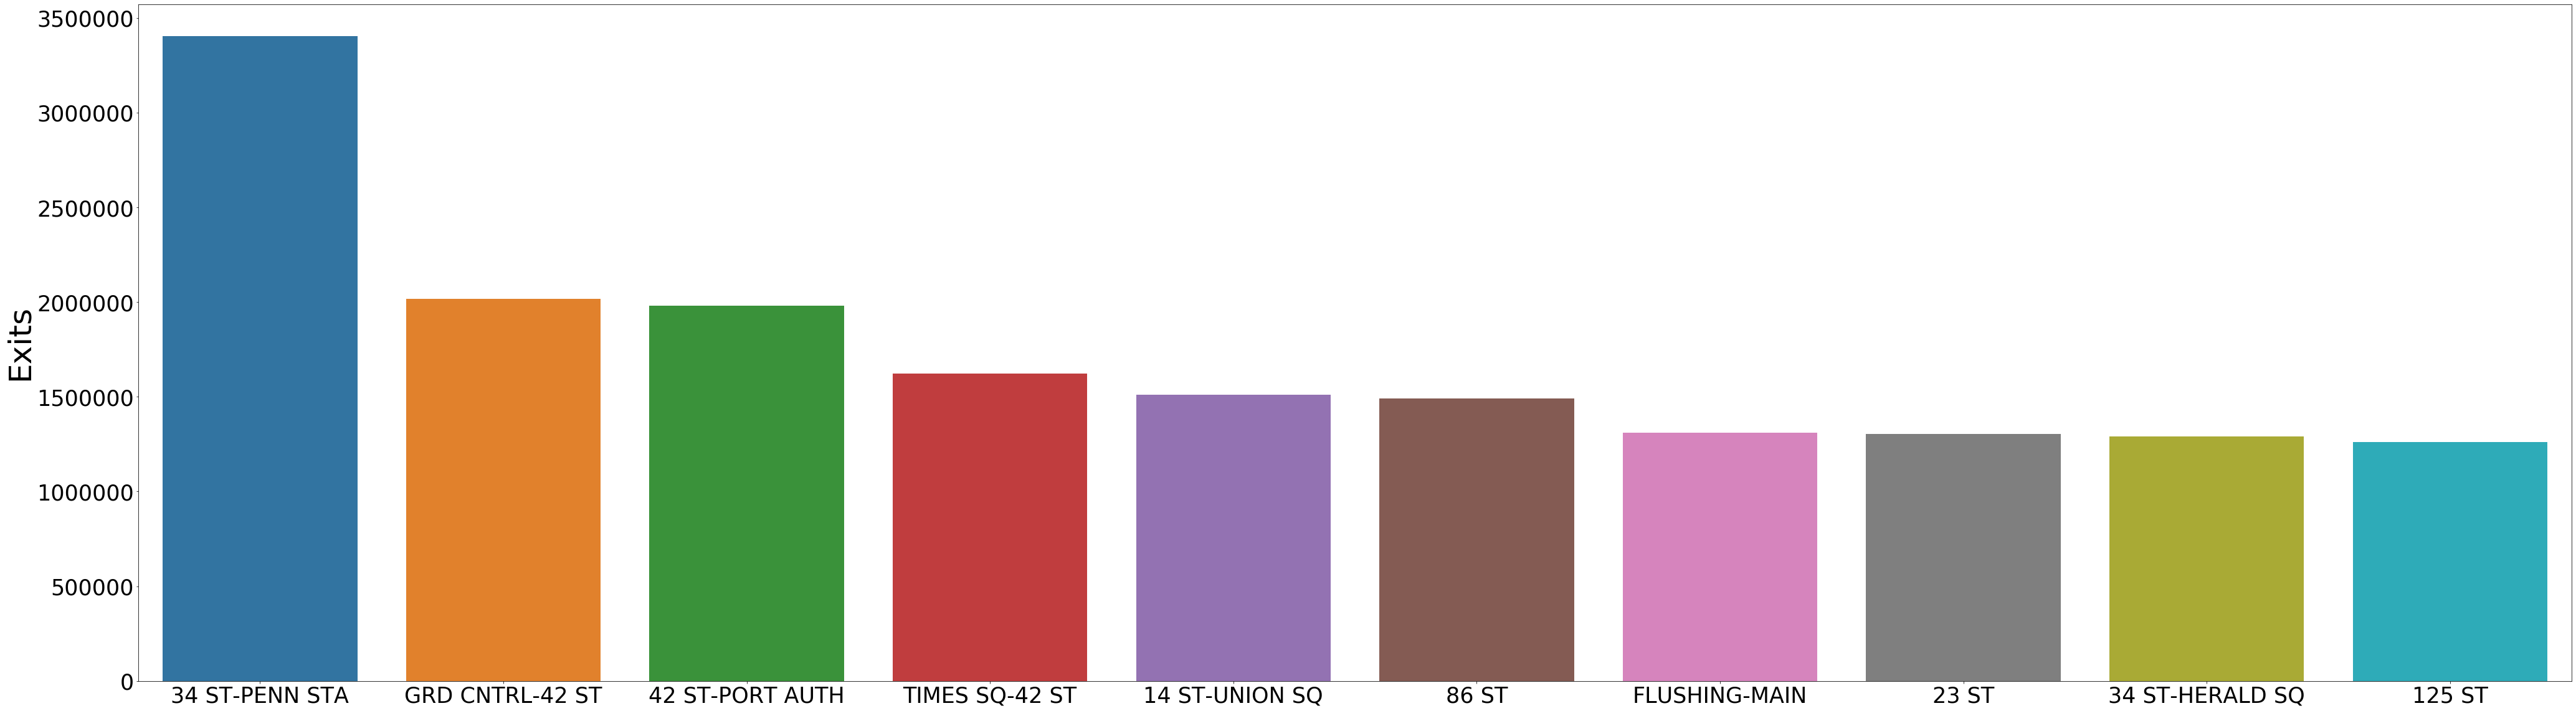

In [69]:
# plt.bar(high10_station_exits_4p_to_8p['STATION'], high10_station_exits_4p_to_8p['EXITS/INCR'])
# plt.xticks(rotation=90)

plt.figure(figsize=(70,20))
top10_plot = sns.barplot(x = high10_station_exits_4p_to_8p['STATION'], y = high10_station_exits_4p_to_8p['EXITS/INCR'])
# top10_plot.tick_params(axis='x',rotation = 90)
top10_plot.set_xlabel(None);
top10_plot.set_ylabel("Exits",fontsize=50);
top10_plot.tick_params(labelsize=35)
top10_plot;

In [24]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# turnstile_file = '/Users/busola.oladapo/Documents/Github/Project_Benson/turnstile_181229.txt'
station_file = '/Users/biancapery/Desktop/Learning/METIS/METIS PROJECTS/Stations.csv'# '/Users/busola.oladapo/Documents/Github/Project_Benson/Stations.csv'
income_file = '/Users/biancapery/Desktop/Learning/METIS/METIS PROJECTS/Income by Zip code.xlsx'# '/Users/busola.oladapo/Documents/Github/Project_Benson/Income by Zip code.xlsx'

project_name = 'Project Benson'

In [25]:
stations = pd.read_csv(station_file)
stations['STATION'] = stations['Stop Name']
stations = stations[['STATION', 'GTFS Latitude', 'GTFS Longitude']]
stations.head()

# some stations appear to have multiple coordinates...get first
stations = stations.groupby('STATION').first().reset_index()
# stations = stations[stations['STATION'] == 'Grand Central - 42 St'].groupby('STATION').first()
stations.head()

,STATION,GTFS Latitude,GTFS Longitude
0,1 Av,40.730953,-73.981628
1,103 St,40.796092,-73.961454
2,103 St - Corona Plaza,40.749865,-73.862700
3,104 St,40.695178,-73.844330
4,110 St,40.795020,-73.944250


In [26]:
high10_station_exits_4p_to_8p.head()
# stations.head()

,STATION,EXITS/INCR
61,34 ST-PENN STA,3402277.0
233,GRD CNTRL-42 ST,2016809.0
68,42 ST-PORT AUTH,1981294.0
353,TIMES SQ-42 ST,1620948.0
14,14 ST-UNION SQ,1512224.0


In [27]:
def clean_station_name(row):
    station = (row['STATION'].strip()
                             .replace('GRD', 'GRAND')
                             .replace('CNTRL', 'CENTRAL')
                             .replace('STA', 'STATION')
                             .replace('ROCK', 'ROCKEFELLER CTR')
                             .replace('COLUMBUS', 'COLUMBUS CIRCLE')
                             .replace(' - ', ' ')
                             .replace('-', ' ')
                             .replace('.', '')
                             .upper())
    return station

# clean station names
high10_station_exits_4p_to_8p['STATION_CLEAN'] = high10_station_exits_4p_to_8p.apply(clean_station_name, axis=1)
high10_station_exits_4p_to_8p.head()

stations['STATION_CLEAN'] = stations.apply(clean_station_name, axis=1)
stations.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,STATION,GTFS Latitude,GTFS Longitude,STATION_CLEAN
0,1 Av,40.730953,-73.981628,1 AV
1,103 St,40.796092,-73.961454,103 ST
2,103 St - Corona Plaza,40.749865,-73.862700,103 ST CORONA PLAZA
3,104 St,40.695178,-73.844330,104 ST
4,110 St,40.795020,-73.944250,110 ST


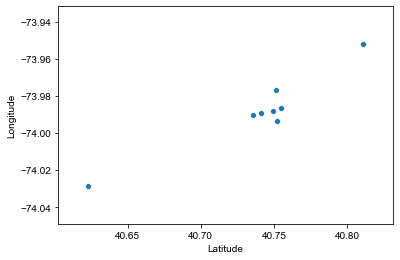

In [82]:
# station_recommendations = pd.merge(high10_station_exits_4p_to_8p, stations, on='STATION_CLEAN', how='left')
# station_recommendations.drop(columns=[''])
# station_recommendations.head()

stations_merged = pd.merge(high10_station_exits_4p_to_8p, stations, on='STATION_CLEAN', how='left')
stations_merged.head()
stations_merged["coords"] = list(zip(stations_merged["GTFS Latitude"], stations_merged["GTFS Longitude"]))
stations_merged = stations_merged.dropna()
station_coords = sns.scatterplot(x = stations_merged["GTFS Latitude"], y = stations_merged["GTFS Longitude"])
station_coords.set_xlabel("Latitude")
station_coords.set_ylabel("Longitude")




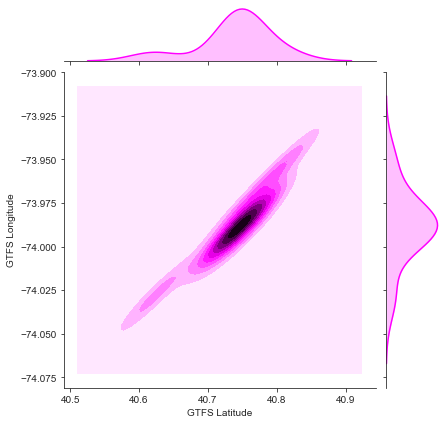

In [104]:
station_coords_joint = sns.jointplot(x = stations_merged["GTFS Latitude"], y = stations_merged["GTFS Longitude"], kind = "kde", color='fuchsia');



In [29]:
stations[stations['STATION'] == 'NORWOOD 205 ST']

,STATION,GTFS Latitude,GTFS Longitude,STATION_CLEAN


In [30]:
# # len(turnstile[turnstile['ENTRIES/INCR'] < 0])
# # mask = (turnstile['C/A'] == 'A025') & (turnstile['UNIT'] == 'R023') & (turnstile['SCP'] == '01-00-00') & (turnstile['STATION'] == '34 ST-HERALD SQ')
# yy = turnstile.loc[('A025', 'R023', '01-00-00', '34 ST-HERALD SQ')]
# # yy[yy['ENTRIES/INCR'] < 0]
# yy['INCR_%'] = yy['ENTRIES/INCR'] / yy['ENTRIES']
# yy[yy['INCR_%'] > 3]
# # yy[yy['DATE'] == '03/05/2019']


yy = turnstile
yy['INCR_%'] = yy['ENTRIES/INCR'] / yy['ENTRIES']
yy[(yy['INCR_%'] > 3) & (yy['ENTRIES/INCR'] > 5000)]

xx = yy.loc[('JFK03', 'R536', '00-00-04', 'JFK JAMAICA CT1')]
xx[xx['DATE'] == '05/11/2019']



LINENAME DIVISION        DATE      TIME  \
C/A   UNIT SCP      STATION                                                   
JFK03 R536 00-00-04 JFK JAMAICA CT1        E      IND  05/11/2019  01:00:00   
                    JFK JAMAICA CT1        E      IND  05/11/2019  05:00:00   
                    JFK JAMAICA CT1        E      IND  05/11/2019  18:00:55   

                                           DESC  ENTRIES  EXITS  \
C/A   UNIT SCP      STATION                                       
JFK03 R536 00-00-04 JFK JAMAICA CT1     REGULAR     9341   5171   
                    JFK JAMAICA CT1     REGULAR     9344   5194   
                    JFK JAMAICA CT1  RECOVR AUD    10238   5709   

                                              DATE_TIME       DAY  WEEK  HOUR  \
C/A   UNIT SCP      STATION                                                     
JFK03 R536 00-00-04 JFK JAMAICA CT1 2019-05-11 01:00:00  Saturday    19     1   
                    JFK JAMAICA CT1 2019-05-11 05:00:00  Saturday    19     5   
                    JFK JAMAICA CT1 2019-05-11 18:00:55  Saturday    19    18   

                                     ENTRIES/INCR  EXITS/INCR     INCR_%  
C/A   UNIT SCP      STATION                                               
JFK03 R536 00-00-04 JFK JAMAICA CT1           3.0        23.0  0.0003212  
                    JFK JAMAICA CT1         894.0       515.0  0.0956764  
                    JFK JAMAICA CT1       73151.0    466202.0  7.1450479

In [31]:
xx = pd.DataFrame(sorted(turnstile['TIME'].unique()))
xx

,0
0,00:00:00
1,00:00:02
2,00:00:03
3,00:00:04
4,00:00:08
5,00:00:09
6,00:00:10
7,00:00:11
8,00:00:12
9,00:00:15
